In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn import preprocessing
from scipy.signal import butter, lfilter
from scipy.stats import entropy
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.interpolate import interp2d

In [2]:
file = sio.loadmat("E:/results/DE3_s01.mat")
data = file['data'] #Here we have our data in shape (trials,bands,electrodes)

In [3]:
data.shape 

(800, 3, 32)

In [4]:
electrode_positions_32 = np.array([[-27, 83], [-36, 76], [-71, 51], [-48, 59],
                                [-33, 33], [-78, 30], [-87, 0], [-63, 0],
                                [-33, -33], [-78, -30], [-71, -51], [-48, -59],
                                [0, -63], [-36, -76], [-27, -83], [0, -87],
                                [27, -83], [36, -76], [48, -59], [71, -51],
                                [78, -30], [33, -33], [63, 0], [87, 0],
                                [78, 30], [33, 33], [48, 59], [71, 51],
                                [36, 76], [27, 83], [0, 63], [0, 0]])

## We take only 1 trial so feats are in shape (bands,electrodes)

In [5]:
feats = data[777,:,:]

In [6]:
def data_1Dto2D_extended(data, values, Y=200, X=200):
    data_2D = np.zeros([Y, X])
    
    # Calculate the center of the matrix
    center_y, center_x = Y // 2, X // 2
    
    # Iterate through electrode coordinates and assign values to the matrix
    s=0
    for idx, (x, y) in enumerate(data):  # Swap x and y
        data_2D[center_y - y, center_x + x] =  values[s]  
        s=s+1   
    return data_2D

In [7]:
electrode_mapping_matrix_32_Theta = data_1Dto2D_extended(electrode_positions_32,feats[0,:], Y=200, X=200)

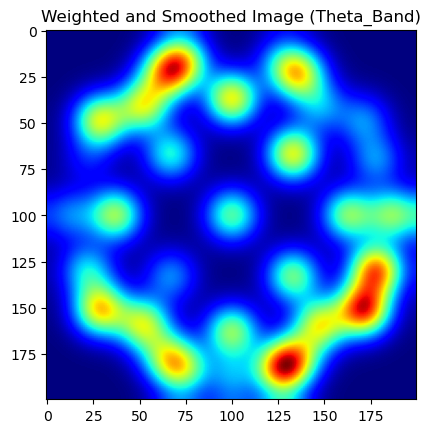

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.ndimage import gaussian_filter
# Your electrode mapping matrix (replace this with your data)
electrode_mapping_matrix = electrode_mapping_matrix_32_Theta

# Find the non-zero indices (electrode points)
nonzero_indices = np.argwhere(electrode_mapping_matrix != 0)

# Set the radius for the circles
radius = 8

# Create a blank array
rows, cols = electrode_mapping_matrix.shape
full_image_array = np.zeros((rows, cols))

# Draw circles on the blank array
for i, j in nonzero_indices:
    y, x = np.ogrid[-i:rows-i, -j:cols-j]
    mask = x**2 + y**2 <= radius**2
    full_image_array[mask] = electrode_mapping_matrix[i, j]
# Apply a Gaussian filter to smooth the interpolated image
# Create a blank array
rows, cols = electrode_mapping_matrix.shape
weighted_image_array = np.zeros((rows, cols))

# Weight each pixel by its corresponding electrode value
for i, j in nonzero_indices:
    weighted_image_array[i, j] = full_image_array[i, j] * electrode_mapping_matrix[i, j]

# Apply a Gaussian filter with a sigma value (adjust as needed)
sigma = 10
weighted_image_array_smoothedR = gaussian_filter(weighted_image_array, sigma=sigma)

# Display the resulting image
plt.imshow(weighted_image_array_smoothedR, cmap='jet')
plt.title('Weighted and Smoothed Image (Theta_Band)')
plt.show()

In [9]:
electrode_mapping_matrix_32_Alpha = data_1Dto2D_extended(electrode_positions_32,feats[1,:], Y=200, X=200)

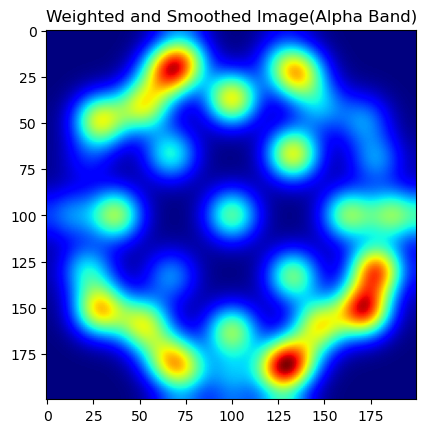

In [10]:
# Your electrode mapping matrix (replace this with your data)
electrode_mapping_matrix = electrode_mapping_matrix_32_Alpha

# Find the non-zero indices (electrode points)
nonzero_indices = np.argwhere(electrode_mapping_matrix != 0)

# Set the radius for the circles
radius = 8

# Create a blank array
rows, cols = electrode_mapping_matrix.shape
full_image_array = np.zeros((rows, cols))

# Draw circles on the blank array
for i, j in nonzero_indices:
    y, x = np.ogrid[-i:rows-i, -j:cols-j]
    mask = x**2 + y**2 <= radius**2
    full_image_array[mask] = electrode_mapping_matrix[i, j]
# Apply a Gaussian filter to smooth the interpolated image
# Create a blank array
rows, cols = electrode_mapping_matrix.shape
weighted_image_array = np.zeros((rows, cols))

# Weight each pixel by its corresponding electrode value
for i, j in nonzero_indices:
    weighted_image_array[i, j] = full_image_array[i, j] * electrode_mapping_matrix[i, j]

# Apply a Gaussian filter with a sigma value (adjust as needed)
sigma = 10
weighted_image_array_smoothedG = gaussian_filter(weighted_image_array, sigma=sigma)

# Display the resulting image
plt.imshow(weighted_image_array_smoothedG, cmap='jet')
plt.title('Weighted and Smoothed Image(Alpha Band)')
plt.show()

In [11]:
electrode_mapping_matrix_32_Beta = data_1Dto2D_extended(electrode_positions_32,feats[2,:], Y=200, X=200)

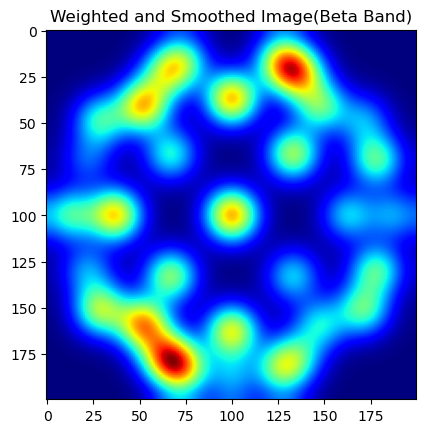

In [12]:
# Your electrode mapping matrix (replace this with your data)
electrode_mapping_matrix = electrode_mapping_matrix_32_Beta

# Find the non-zero indices (electrode points)
nonzero_indices = np.argwhere(electrode_mapping_matrix != 0)

# Set the radius for the circles
radius = 8

# Create a blank array
rows, cols = electrode_mapping_matrix.shape
full_image_array = np.zeros((rows, cols))

# Draw circles on the blank array
for i, j in nonzero_indices:
    y, x = np.ogrid[-i:rows-i, -j:cols-j]
    mask = x**2 + y**2 <= radius**2
    full_image_array[mask] = electrode_mapping_matrix[i, j]
# Apply a Gaussian filter to smooth the interpolated image
# Create a blank array
rows, cols = electrode_mapping_matrix.shape
weighted_image_array = np.zeros((rows, cols))

# Weight each pixel by its corresponding electrode value
for i, j in nonzero_indices:
    weighted_image_array[i, j] = full_image_array[i, j] * electrode_mapping_matrix[i, j]

# Apply a Gaussian filter with a sigma value (adjust as needed)
sigma = 10
weighted_image_array_smoothedB = gaussian_filter(weighted_image_array, sigma=sigma)

# Display the resulting image
plt.imshow(weighted_image_array_smoothedB, cmap='jet')
plt.title('Weighted and Smoothed Image(Beta Band)')
plt.show()

In [13]:
RGB_Image = np.zeros ((200,200,3))

In [14]:
RGB_Image[:,:,0] = weighted_image_array_smoothedR
RGB_Image[:,:,1] = weighted_image_array_smoothedG
RGB_Image[:,:,2] = weighted_image_array_smoothedB

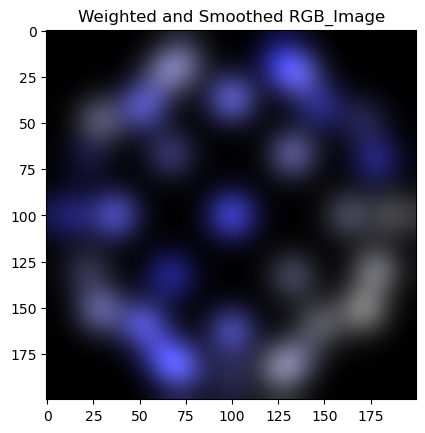

In [15]:
# Normalize the image
min_val = RGB_Image.min()
max_val = RGB_Image.max()

# Avoid division by zero if the max and min are the same
if max_val != min_val:
    RGB_Image = (RGB_Image - min_val) / (max_val - min_val)
else:
    RGB_Image = np.zeros_like(RGB_Image)

# Display the resulting image
plt.imshow(RGB_Image)
plt.title('Weighted and Smoothed RGB_Image')
plt.show()